In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data1 = np.load('./data_for_xi_calculation/dX_data_t=27_to_t=30_grid_32_c=1by32_decor_t_32min.npz')
data2 = np.load('./data_for_xi_calculation/dX_data_t=30_to_t=33_grid_32_c=1by32_decor_t_32min.npz')
data3 = np.load('./data_for_xi_calculation/dX_data_t=33_to_t=36_grid_32_c=1by32_decor_t_32min.npz')
data4 = np.load('./data_for_xi_calculation/dX_data_t=36_to_t=39_grid_32_c=1by32_decor_t_32min.npz')
data5 = np.load('./data_for_xi_calculation/dX_data_t=39_to_t=42_grid_32_c=1by32_decor_t_32min.npz')
data6 = np.load('./data_for_xi_calculation/dX_data_t=42_to_t=45_grid_32_c=1by32_decor_t_32min.npz')

In [6]:
data1.files

['dX_x', 'dX_y']

In [7]:
dX1 = np.concatenate((data1['dX_x'], data2['dX_x'], data3['dX_x'], data4['dX_x'], data5['dX_x'], data6['dX_x']), axis=0)
dX2 = np.concatenate((data1['dX_y'], data2['dX_y'], data3['dX_y'], data4['dX_y'], data5['dX_y'], data6['dX_y']), axis=0)

In [8]:
dX1.shape, dX2.shape

((451, 7392), (451, 7392))

In [11]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(451, 14784)

In [12]:
m = dX.shape[0]
print(m)

451


In [13]:
from numpy import linalg as LA
from scipy import signal

In [14]:
Dt_c = 0.04
scaled_dX = dX/np.sqrt(Dt_c)

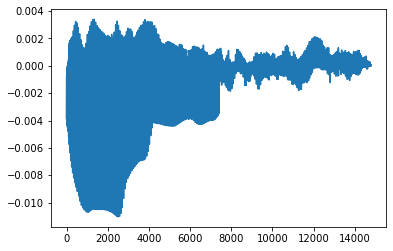

In [15]:
plt.plot(np.mean(scaled_dX, axis=0))

In [16]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(451, 14784)

In [17]:
A, b, CT = LA.svd(F, full_matrices=False)

Text(0, 0.5, 'Eigenvalue, $\\lambda_i$')

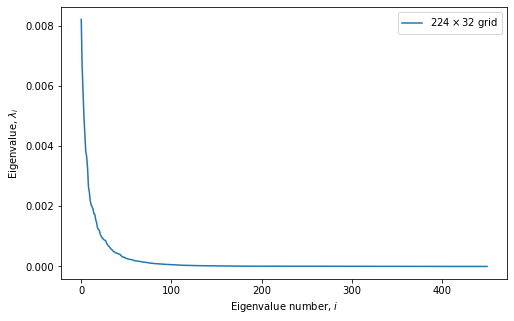

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(b**2/(m-1), label=r'$224 \times 32$ grid')
ax.legend()
ax.set_xlabel(r"Eigenvalue number, $i$")
ax.set_ylabel(r"Eigenvalue, $\lambda_i$")
# plt.savefig("./plots/eigenvalue_grid_32_t27_to_t45_decor_t_80min.png", dpi=300)

In [19]:
b**2/(m-1)

array([8.21477178e-03, 6.65331564e-03, 5.82367013e-03, 4.97761854e-03,
       4.42171709e-03, 3.83168631e-03, 3.64821059e-03, 3.28554888e-03,
       2.64369679e-03, 2.46902358e-03, 2.17967684e-03, 2.04159178e-03,
       1.98719750e-03, 1.91581508e-03, 1.75096419e-03, 1.73845748e-03,
       1.56158481e-03, 1.46153499e-03, 1.28766961e-03, 1.22595521e-03,
       1.20148521e-03, 1.07817720e-03, 1.01140987e-03, 9.51366408e-04,
       9.33730466e-04, 8.88811132e-04, 8.72793729e-04, 8.59067279e-04,
       7.77441517e-04, 7.27058194e-04, 6.80303255e-04, 6.63974701e-04,
       6.17571079e-04, 5.80376239e-04, 5.58385178e-04, 5.25011833e-04,
       4.87906813e-04, 4.86392818e-04, 4.53686225e-04, 4.44561129e-04,
       4.35441517e-04, 4.22353457e-04, 4.11973265e-04, 3.97427723e-04,
       3.68320697e-04, 3.30495556e-04, 3.15595105e-04, 3.07465003e-04,
       3.00465756e-04, 2.79104597e-04, 2.66898164e-04, 2.59617964e-04,
       2.47752317e-04, 2.43066034e-04, 2.33793359e-04, 2.27002804e-04,
      

In [20]:
B = np.diag(b)

In [21]:
B = np.diag(b/np.sqrt(m-1))

In [22]:
B.shape, CT.shape

((451, 451), (451, 14784))

In [23]:
BCT = np.matmul(B, CT)


In [24]:
var_vec = b**2/(m-1)

In [25]:
n_eigval = 51

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')


Total vairance captured by first 51 eigenvalues: 89.97817255373239


In [26]:
n_eigval = 21

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 21 eigenvalues: 70.79102747159051


In [27]:
n_eigval = 10

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 10 eigenvalues: 50.59314041303212


In [28]:
BCT.shape, BCT

((451, 14784),
 array([[ 2.58691477e-03,  2.61522353e-03,  1.09410514e-03, ...,
         -9.87252260e-05,  1.65453572e-18,  1.60821115e-18],
        [ 7.50741955e-04,  6.51090190e-04, -2.26514768e-04, ...,
         -1.10496726e-04,  7.89323728e-20,  1.81482572e-19],
        [ 5.80700084e-04,  6.10089226e-04,  1.29305498e-03, ...,
         -5.63181793e-05, -1.09153876e-18, -1.39012117e-18],
        ...,
        [ 2.05153275e-07,  9.20328474e-07,  3.58372765e-07, ...,
         -7.43876197e-08, -7.35902161e-22, -1.74770165e-21],
        [-6.55852122e-07, -2.81221587e-07, -7.22055014e-07, ...,
         -6.92939946e-07,  3.02781718e-21,  2.33903982e-21],
        [ 3.10854189e-18,  1.90889326e-18,  1.75151393e-19, ...,
          1.49449082e-20, -6.93152933e-34, -2.97769402e-33]]))

In [29]:
CT.shape

(451, 14784)

In [30]:
combined_vec = BCT
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((451, 14784), (451, 7392, 2))

([<matplotlib.lines.Line2D at 0x70c650dd0d60>],
 [<matplotlib.lines.Line2D at 0x70c650dd1210>])

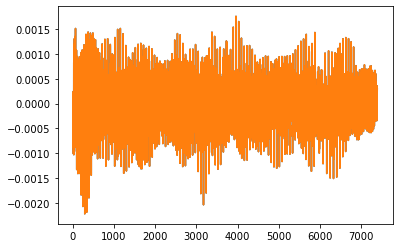

In [31]:
plt.plot(combined_vec[10,:7392]), plt.plot(detached_vec[10,:,0])

True

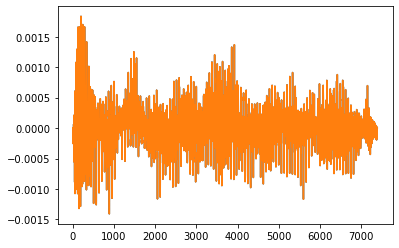

In [32]:
plt.plot(combined_vec[10,7392:]), plt.plot(detached_vec[10,:,1])
np.allclose(combined_vec[10,7392:], detached_vec[10,:,1])

In [33]:
xi_mat = detached_vec

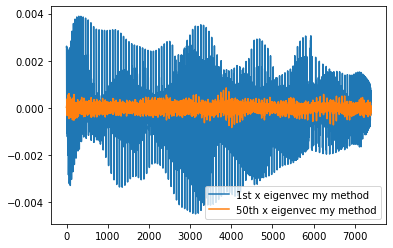

In [34]:
plt.plot(xi_mat[0,:,0], label='1st x eigenvec my method'), plt.plot(xi_mat[49,:,0], label='50th x eigenvec my method')
plt.legend()

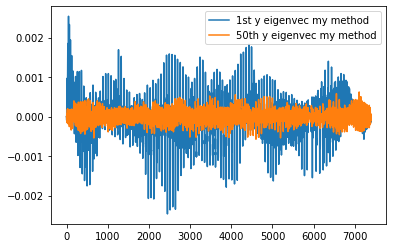

In [35]:
plt.plot(xi_mat[0,:,1], label='1st y eigenvec my method'), plt.plot(xi_mat[49,:,1], label='50th y eigenvec my method')
plt.legend()

In [36]:
eig_vec = xi_mat[:51,:,:]
eig_vec.shape

(51, 7392, 2)

In [37]:
eig_vec[0,:].shape

(7392, 2)

In [38]:
data_file = './xi_vec_data/xi_matrix_combined_calc_51_eigvec_grid_32_c_1_by_32_decor_t_32min_t=27_to_t=45.npz'

np.savez(data_file, xi_mat = eig_vec)